<a href="https://colab.research.google.com/github/hasibulhshovo/COMP432/blob/main/lab3/lab_3_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LAB 03***

### Main points that we will go over
* Implement linear classifier $f(X; \theta, \theta_0) = sign(\theta^T X + \theta_0)$ from mathematical formulation
* Code the Random Linear Classifier that tests $k$ where $k$ is random
* Build the Perceptron with iterative weight updates when mistakes occur
* Visualize decision boundaries and track convergence behavior
* Compare both algorithms' performance on training and test data
* An Example of the Perceptron through Sklearn



### Supplementary Visualization
For an interactive demonstration of the Perceptron algorithm, [Perceptron Visualizer](https://vinizinho.net/projects/perceptron-viz/)

--------------------------------------------------

### The Dataset: Skill Classification
We use a synthetic dataset (just for illustration) predicting whether someone becomes "Highly Skilled" based on:

* **Study_Hours**: Hours spent studying (1-10 hours)
* **Num_of_exercises_solved**: Practice exercises completed (30-90 exercises)  
* **Target**: Binary classification - Highly Skilled (Yes = +1 / No = -1)
* **Size**: 44 samples, linearly separable problem

--------------------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import io

# Part 1: A small sample from a Binary Classification Dataset


In [ ]:
# Simple dataset: Student High Grade/ Low Grade based on study hours and attendance
data = """Study_Hours,Num_of_exercises_solved,Highly_Skilled
2,40,No
3,50,No
4,45,No
5,55,No
6,65,Yes
7,70,Yes
8,75,Yes
9,80,Yes
7,85,Yes
8,90,Yes
3,70,No
4,80,Yes
5,60,No
6,75,Yes
7,65,Yes
2,35,No
3,40,No
4,50,No
5,70,Yes
6,55,No
7,80,Yes
8,85,Yes
9,90,Yes
2,60,No
3,65,No
4,70,No
5,75,Yes
6,80,Yes
7,60,Yes
8,70,Yes
9,75,Yes
1,30,No
2,45,No
3,55,No
4,65,No
5,85,Yes
6,90,Yes
10,85,Yes
9,70,Yes
8,65,Yes
7,50,No
6,45,No
5,40,No
4,85,Yes
3,80,No"""

# Load and prepare the data


In [ ]:
df = pd.read_csv(io.StringIO(data))
print(df.head())
print(f"Dataset shape: {df.shape}")

# Convert High/Low to +1/-1 (as per lecture notation)
df['Highly_Skilled'] = df['Highly_Skilled'].map({'Yes': 1, 'No': -1})


   Study_Hours  Num_of_exercises_solved Highly_Skilled
0            2                       40             No
1            3                       50             No
2            4                       45             No
3            5                       55             No
4            6                       65            Yes
Dataset shape: (45, 3)


In [ ]:
# Extract features (X) and labels (y)
X = df[['Study_Hours', 'Num_of_exercises_solved']].values  # Shape: (N, d) where d=2
y = df['Highly_Skilled'].values  # Shape: (N,)

# # Normalize features for better performance  (Here, we can comment the normalization lines and re run the below cells to see the effect of normalization)
# Calculate the mean of each feature (column)
X_mean = X.mean(axis=0)

# Calculate the standard deviation of each feature (column)
X_std = X.std(axis=0)

Feature dimensions: (45, 2)
Number of samples: 45
Number of positive samples: 24
Number of negative samples: 21


**What is Normalization?**

Normalization is a data preprocessing technique that scales numerical features in a dataset to a standard range. The most common type, Z-score normalization (or standardization), rescales the data so it has a mean of 0 and a standard deviation of 1.

**Why is Normalization Needed?**

Normalization is crucial for many machine learning algorithms because it ensures that all features contribute equally to the model's performance, preventing features with large values from dominating those with smaller values.

**Key reasons for normalization include:**

1. **Equal Contribution:** Algorithms sensitive to feature magnitudes, like Support Vector Machines (SVMs), K-Nearest Neighbors (KNN), and Principal Component Analysis (PCA), perform much better when features are on a similar scale.
2. **Faster Convergence:** For optimization algorithms like gradient descent, used to train models such as neural networks and linear regression, normalization helps the algorithm converge to a solution more quickly. It reshapes the cost function's surface, allowing for more direct steps toward the minimum.
3. **Prevents Numerical Instability:** It helps avoid numerical issues (like underflow or overflow) that can occur when dealing with extremely large or small numbers in calculations.

In [ ]:
# Apply the normalization formula: (X - mean) / standard_deviation
X_normalized = (X - X_mean) / X_std

print(f"Feature dimensions: {X_normalized.shape}")
print(f"Number of samples: {len(y)}")
print(f"Number of positive samples: {(y == 1).sum()}")
print(f"Number of negative samples: {(y == -1).sum()}")

# Part 2: Implement Linear Classifier

### Linear Classifier

A **linear classifier** is a machine learning model that makes a classification decision by combining input features using a linear function. Essentially, it finds a straight line (or a flat plane in higher dimensions) to separate different classes of data.

The decision is based on a simple rule: If the result of the linear function is positive, the model predicts one class. If it's negative, it predicts the other.

This separating line is called the **decision boundary**. The model learns the optimal position of this line from the data during training.

The linear classifier is defined as:

$$f(X; \theta, \theta_0) = sign(\theta^T X + \theta_0)$$

where:
* Returns **+1** if $\theta^T X + \theta_0 > 0$
* Returns **-1** if $\theta^T X + \theta_0 \leq 0$

In [ ]:
class LinearClassifier:
    # The constructor initializes the model's parameters.
    # It takes the number of input features, d, as an argument.
    def __init__(self, d):
        # Initialize the weight vector 'theta' with random values.
        # The shape of theta is (d,), where d is the number of features.
        # This vector represents the weights assigned to each feature.
        self.theta = np.random.randn(d)  # θ ∈ R^d (column vector)
        # Initialize the bias term 'theta0' with a random value.
        # The bias allows the decision boundary to be shifted,
        # providing more flexibility to the model.
        self.theta0 = np.random.randn()  # θnode ∈ R (bias/intercept)

    # The predict method makes a prediction for a given set of data points.
    # It takes the feature matrix X as input.
    def predict(self, X):
        # Calculate the linear combination of features and weights: X.dot(theta) + theta0.
        # X.dot(self.theta) performs the dot product, summing the products of each feature with its corresponding weight.
        # The np.sign() function then returns +1 if the result is positive,
        # -1 if it's negative, and 0 if it's zero. This effectivelyclassifies the data into one of two classes.
      return np.sign(X.dot(self.theta) + self.theta0)

    # The compute_error method calculates the classification error (0-1 loss).
    # It measures the fraction of misclassified samples.
    # It takes the feature matrix X and the true labels y as input.
    def compute_error(self, X, y):
        # Generate predictions for the given data.
        predictions = self.predict(X)

        # Calculate the error by finding the mean of all instances where
        # the prediction does not match the true label.
        # (predictions != y) creates a boolean array where True indicates a misclassification.
        # np.mean() then calculates the fraction of True values (which are treated as 1s).
        error = np.mean(predictions != y)
        return error

# Create an instance of the LinearClassifier with 2 features.
clf = LinearClassifier(d=2)

# Make predictions on the normalized data.
predictions = clf.predict(X_normalized)

# Compute the classification error using the normalized data and true labels.
error = clf.compute_error(X_normalized, y)

# Print the calculated error and accuracy.
# Accuracy is simply 1 minus the error.
print("Error: ", error)
print("Accuracy: ", 1 - error)

Error:  0.4666666666666667
Accuracy:  0.5333333333333333


# Part 3: Implement Random Linear Classifier Algorithm


A **Random Linear Classifier** is a simple, non-learning-based classification model that relies on chance. It's not a standard, practical algorithm but rather a pedagogical tool to demonstrate the role of weights and the concept of a decision boundary before introducing more complex, training-based methods.

Instead of an optimization algorithm (like gradient descent) to find the best separating line, it generates a specified number of linear classifiers, each with randomly chosen weights and a random bias. It then selects the one that performs the best on the training data. This process is a form of brute-force search.

In [ ]:
# Define a function to find the best linear classifier out of many random ones.
def random_linear_classifier(X_train, y_train, k=100):
    # This function generates 'k' random linear classifiers and
    # returns the one with the lowest training error.
    # It demonstrates a simple "brute-force" method for finding a good model.

    # Get the number of features (d) from the training data.
    # X_train.shape[1] gives the number of columns.
    d = X_train.shape[1]  # Feature dimension

    # Initialize variables to keep track of the best classifier found so far.
    # 'best_error' is set to infinity so that the first classifier's error will always be lower.
    best_error = float('inf')
    best_classifier = None
    # 'errors' list will store the error of each classifier for analysis.
    errors = []

    print(f"\nTrying {k} random linear classifiers ")

    # Loop 'k' times to create and evaluate 'k' different classifiers.
    for i in range(k):
        # 1. Create a new LinearClassifier with random weights and bias.
        clf = LinearClassifier(d)

        # 2. Compute the training error for this new, random classifier.
        error = clf.compute_error(X_train, y_train)
        errors.append(error)

        # 3. Check if this classifier is better than the best one found so far.
        if error < best_error:
            # If so, update the 'best_error' and store a reference to this
            # new 'best_classifier' object.
            best_error = error
            best_classifier = clf
            print(f"  Iteration {i+1}: New best error = {best_error:.3f}")

    # 4. Return the best classifier, its error, and the list of all errors.
    return best_classifier, best_error, errors


# Part 4: Train and Evaluate


Split data into training and test sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42
)
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 31
Test samples: 14


Try different values of $k$ (hyperparameter)




In [ ]:
# Try different values of k (hyperparameter)
# 'k' is a hyperparameter for our random classifier model.
# A hyperparameter is a setting that controls the learning process itself.
# In this case, 'k' determines how many random classifiers we generate
# to find the best one.
k_values = [10, 50, 100, 500]
results = []

# Initialize variables to save the single best classifier found
# across all values of k. We'll use the test error as the ultimate
# measure of performance.
overall_best_clf = None
overall_best_error = float('inf')
overall_best_k = 0 # To store the k value that produced the best classifier

# Loop through each 'k' value to evaluate the model's performance
# as we increase the number of random trials.
for k in k_values:
    # 1. Train the model using the current k value.
    # The 'random_linear_classifier' function returns the best classifier
    # found on the training data, its training error, and a list of all errors.
    best_clf, train_error, all_errors = random_linear_classifier(X_train, y_train, k)

    # 2. Evaluate the best classifier on the unseen test data.
    # This gives us a more realistic measure of the model's performance
    # and its ability to generalize.
    test_error = best_clf.compute_error(X_test, y_test)

    # 3. Check if this classifier is the best one we've seen so far.
    # We compare based on the 'test_error' because that's our goal:
    # to find a model that performs well on new data.
    if test_error < overall_best_error:
        overall_best_error = test_error
        overall_best_clf = best_clf
        overall_best_k = k

    # 4. Store the results for the current k value in a dictionary.
    results.append({
        'k': k,
        'train_error': train_error,
        'test_error': test_error,
        'train_acc': (1 - train_error) * 100,
        'test_acc': (1 - test_error) * 100
    })

    # 5. Print the results to the console for real-time monitoring.
    print(f"\nk={k}:")
    print(f"  Best training error: {train_error:.3f}")
    print(f"  Test error: {test_error:.3f}")
    print(f"  Test accuracy: {(1 - test_error) * 100:.1f}%")


Trying 10 random linear classifiers 
  Iteration 1: New best error = 0.710
  Iteration 2: New best error = 0.452
  Iteration 3: New best error = 0.065

k=10:
  Best training error: 0.065
  Test error: 0.071
  Test accuracy: 92.9%

Trying 50 random linear classifiers 
  Iteration 1: New best error = 0.452
  Iteration 2: New best error = 0.161
  Iteration 10: New best error = 0.032

k=50:
  Best training error: 0.032
  Test error: 0.071
  Test accuracy: 92.9%

Trying 100 random linear classifiers 
  Iteration 1: New best error = 0.742
  Iteration 2: New best error = 0.419
  Iteration 3: New best error = 0.065
  Iteration 6: New best error = 0.000

k=100:
  Best training error: 0.000
  Test error: 0.000
  Test accuracy: 100.0%

Trying 500 random linear classifiers 
  Iteration 1: New best error = 0.548
  Iteration 2: New best error = 0.419
  Iteration 5: New best error = 0.161
  Iteration 7: New best error = 0.097
  Iteration 32: New best error = 0.032
  Iteration 203: New best error = 0

# Part 5: Visualizing the results

In [ ]:
# Display results
results_df = pd.DataFrame(results)
print("Results Summary:")
print(results_df)

Results Summary:
     k  train_error  test_error   train_acc    test_acc
0   10     0.064516    0.071429   93.548387   92.857143
1   50     0.032258    0.071429   96.774194   92.857143
2  100     0.000000    0.000000  100.000000  100.000000
3  500     0.000000    0.000000  100.000000  100.000000


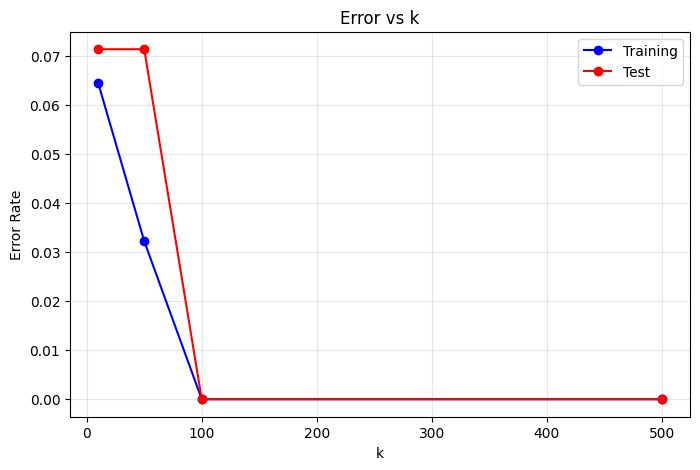

In [ ]:
# Plot 1: Error vs k
plt.figure(figsize=(8, 5))
plt.plot(results_df['k'], results_df['train_error'], 'b-o', label='Training')
plt.plot(results_df['k'], results_df['test_error'], 'r-o', label='Test')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error vs k')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


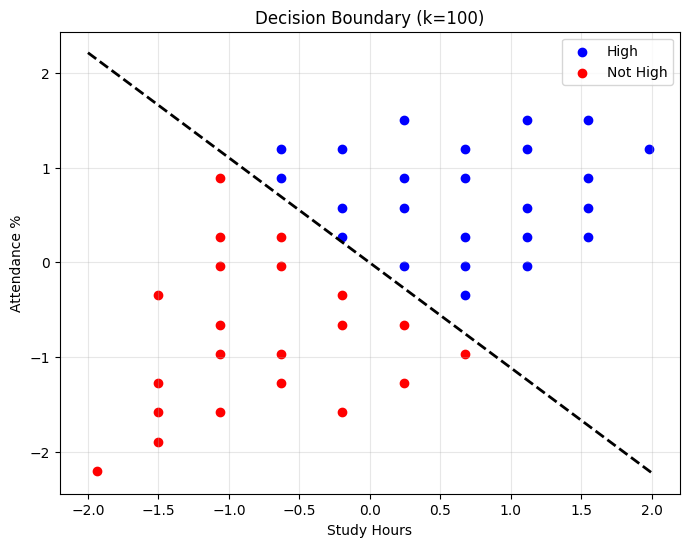

In [ ]:

# Plot 2: Decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[y==1, 0], X_normalized[y==1, 1], c='blue', label='High')
plt.scatter(X_normalized[y==-1, 0], X_normalized[y==-1, 1], c='red', label='Not High')

# Draw decision boundary line
x_plot = np.array([-2, 2])
y_plot = -(overall_best_clf.theta[0] * x_plot + overall_best_clf.theta0) / overall_best_clf.theta[1]
plt.plot(x_plot, y_plot, 'k--', linewidth=2)

plt.xlabel('Study Hours')
plt.ylabel('Attendance %')
plt.title(f'Decision Boundary (k={overall_best_k})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Print final model parameters for inspection
# These are the weights (theta) and bias (theta0) of the single best
# classifier that was found after trying different values of k.
# These parameters define the final decision boundary of the model.
print(f"\nFinal Model Parameters:")
print(f"θ (weights): {overall_best_clf.theta}")
print(f"θ0 (bias): {overall_best_clf.theta0:.3f}")

# Compute decision boundary equation
# This is the equation of the straight line that separates the two classes.
# The formula is: theta[0]*x1 + theta[1]*x2 + theta0 = 0
print(f"\nDecision Boundary Equation:")
print(f"{overall_best_clf.theta[0]:.3f} * x1 + {overall_best_clf.theta[1]:.3f} * x2 + {overall_best_clf.theta0:.3f} = 0")


Final Model Parameters:
θ (weights): [1.27634472 1.1511519 ]
θ0 (bias): 0.006

Decision Boundary Equation:
1.276 * x1 + 1.151 * x2 + 0.006 = 0


# The Perceptron

### What is Perceptron?
A **Perceptron** is a fundamental algorithm for binary classification. It's a type of linear classifier that learns the optimal separating hyperplane (a line in 2D) to divide two classes of data.

### Why Do We Need It?
We need the Perceptron because it provides a simple and intuitive way to train a linear classifier. Unlike the "random" approach of guessing a good line, the Perceptron has a specific learning algorithm. It starts with a random line and then systematically adjusts its position and orientation every time it makes a mistake. This process guarantees that if the data is linearly separable, the Perceptron will find a perfect separating line in a finite number of steps. It's the simplest example of a learning algorithm that adjusts its parameters based on prediction errors.

### How it Works:
**Start:** The Perceptron begins with a simple, random rule. For example, "An email is spam if it contains more than 10 exclamation marks and 5 capital letters."

**Make a Prediction:** The algorithm then takes the first email from your inbox, checks these two features, and makes a prediction (spam or not spam).

**Check and Learn:**

If the prediction is correct, the Perceptron does nothing and moves to the next email.

If the prediction is wrong (e.g., it predicted a spam email was not spam), it adjusts its rule slightly to better classify that specific email. It might increase the weight on "exclamation marks" to be more sensitive to them in the future.

**Repeat:** This process repeats for thousands of emails. With each mistake, the Perceptron's rule becomes more refined, learning from every error.

After processing a large number of emails, the Perceptron will have found a much better rule (a separating line) that accurately filters spam. The core idea is that it learns by correcting its own mistakes, making it a true learning algorithm, unlike the "guess and check" method of the random classifier.

In [ ]:
# The Perceptron class implements the Perceptron learning algorithm.
# This model finds a linear decision boundary for binary classification.
class Perceptron:
    def __init__(self):
        # Initialize weights (theta) and bias (theta0) to None.
        # They will be set to zeros when the fit method is called.
        self.theta = None
        self.theta0 = None
        # The history list stores the model's state at each epoch for analysis.
        self.history = []

    def fit(self, X, y, epochs=50): # training function
        # Get the number of samples (N) and features (d).
        N, d = X.shape
        # Initialize weights and bias to zeros.
        # This ensures a reproducible starting point for training.
        self.theta = np.zeros(d)
        self.theta0 = 0

        # The main training loop. It iterates through the dataset 'epochs' times.
        for epoch in range(epochs):
            mistakes = 0
            # Loop through each data point in the training set.
            for i in range(N):
                # The core of the Perceptron algorithm: check for misclassification.
                # The condition `y[i] * (X[i].dot(self.theta) + self.theta0) <= 0`
                # checks if the sign of the prediction (theta^T*x + theta0)
                # is different from the true label y[i]. If they have opposite
                # signs (or the prediction is zero), it's a mistake.
                if y[i] * (X[i].dot(self.theta) + self.theta0) <= 0:
                    # If a mistake is found, update the weights and bias.
                    # The update rule adds the misclassified point's features
                    # (scaled by its label) to the weights. This moves the
                    # decision boundary closer to correctly classifying the
                    # misclassified point.
                    self.theta += y[i] * X[i]
                    self.theta0 += y[i]
                    mistakes += 1

            # Save the state of the model at the end of the current epoch.
            self.history.append({
                'epoch': epoch,
                'theta': self.theta.copy(),
                'theta0': self.theta0,
                'mistakes': mistakes
            })

            # If no mistakes were made in an entire pass through the data,
            # the algorithm has converged, and we can stop training early.
            if mistakes == 0:
                print(f"Converged at epoch {epoch + 1}")
                break

        return self

    def predict(self, X):
        # Make a prediction by applying the sign function to the linear combination.
        return np.sign(X.dot(self.theta) + self.theta0)

    def score(self, X, y):
        # Compute the accuracy by comparing predictions to true labels.
        # It returns the fraction of correctly classified samples.
        return np.mean(self.predict(X) == y)

# Create an instance of the Perceptron model.
perceptron = Perceptron()
# Train the model on the training data for a maximum of 30 epochs.
perceptron.fit(X_train, y_train, epochs=30)

# Print the final accuracy on both the training and test sets.
print(f"Training accuracy: {perceptron.score(X_train, y_train):.2%}")
print(f"Test accuracy: {perceptron.score(X_test, y_test):.2%}")

Converged at epoch 9
Training accuracy: 100.00%
Test accuracy: 100.00%


# Perceptron Learning Visualization

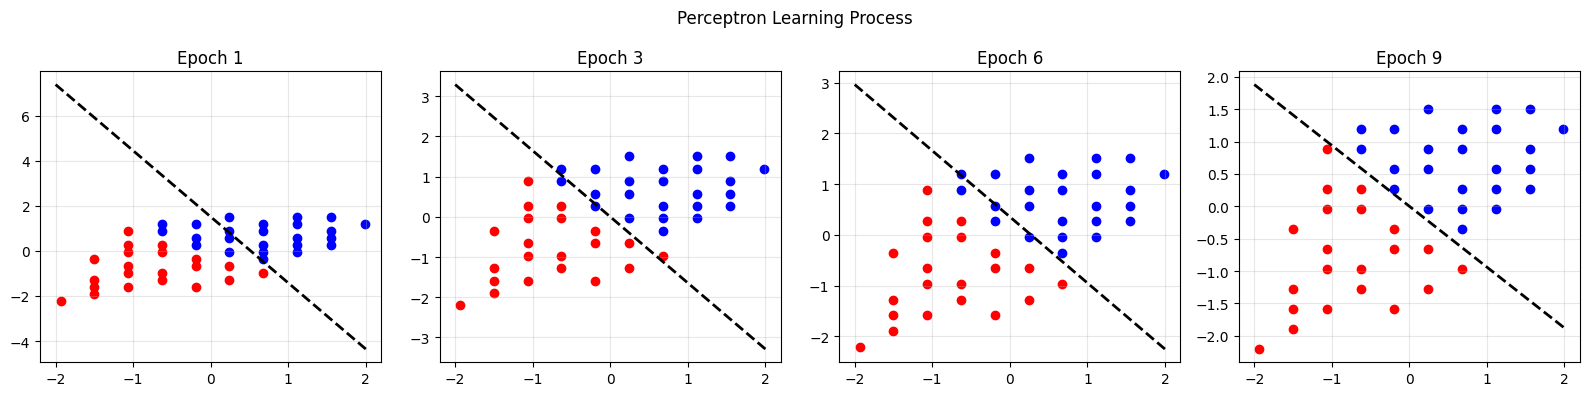

In [ ]:
# Show 4 stages of the Perceptron learning process
# We select key epochs to visualize the decision boundary's evolution:
# initial state (epoch 0), early learning, middle, and the final state.
epochs = [0, 2, 5, -1]
fig, axes = plt.subplots(1, 4, figsize=(16, 4)) # Create a 1x4 subplot grid

# Loop through the selected epochs to plot each stage.
for i, ep in enumerate(epochs):
    ax = axes[i]
    # Get the model's parameters (theta and theta0) at this specific epoch.
    # The -1 index gets the last epoch, representing the final state.
    state = perceptron.history[ep]

    # Plot the data points
    # Plot points with a label of +1 in blue.
    ax.scatter(X_normalized[y==1, 0], X_normalized[y==1, 1], c='blue')
    # Plot points with a label of -1 in red.
    ax.scatter(X_normalized[y==-1, 0], X_normalized[y==-1, 1], c='red')

    # Plot the decision boundary line
    # The equation of the line is derived from the linear classifier equation:
    # theta[0]*x1 + theta[1]*x2 + theta0 = 0
    # We solve for x2 (y_line) to plot it:
    # x2 = -(theta[0]*x1 + theta0) / theta[1]
    x = np.array([-2, 2])
    y_line = -(state['theta'][0] * x + state['theta0']) / state['theta'][1]
    ax.plot(x, y_line, 'k--', lw=2)

    # Set plot titles and grid for clarity
    ax.set_title(f"Epoch {state['epoch']+1}")
    ax.grid(alpha=0.3)

# Add a main title for the entire figure and adjust layout.
plt.suptitle('Perceptron Learning Process')
plt.tight_layout()
plt.show()

# Plot Learning Curve


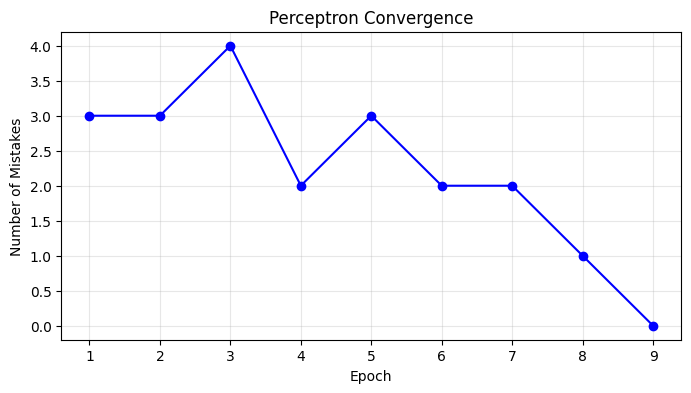

In [ ]:
# Create a figure for the plot
plt.figure(figsize=(8, 4))

# Extract the number of mistakes from the training history for each epoch
mistakes_per_epoch = [h['mistakes'] for h in perceptron.history]

# Plot the number of mistakes against the epoch number
plt.plot(range(1, len(mistakes_per_epoch)+1), mistakes_per_epoch, 'b-o')

# Add labels and title for clarity
plt.xlabel('Epoch')
plt.ylabel('Number of Mistakes')
plt.title('Perceptron Convergence')

# Add a grid for better readability and display the plot
plt.grid(alpha=0.3)
plt.show()

# For our final part, we will look at a real world example. Will also use sklearn directly

In [ ]:
# Import necessary libraries
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the breast cancer dataset.
# The `return_X_y=True` argument returns the features (X) and labels (y) separately.
X, y = load_breast_cancer(return_X_y=True)

# Split the dataset into training and testing sets.
# 70% of the data is used for training, and 30% is for testing.
# `random_state=42` ensures the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features.
# StandardScaler removes the mean and scales to unit variance.
# This is crucial for Perceptron as it is sensitive to feature scaling.
scaler = StandardScaler()
# `fit_transform` learns the scaling parameters from the training data and applies the transformation.
X_train_scaled = scaler.fit_transform(X_train)
# `transform` applies the same scaling learned from the training data to the test data.
# This prevents data leakage from the test set.
X_test_scaled = scaler.transform(X_test)

# Train the Perceptron model.
# `max_iter` sets the maximum number of passes over the training data.
# `random_state` ensures the weight initialization is the same for reproducibility.
perceptron = Perceptron(max_iter=100, random_state=42)
# `fit` trains the model using the scaled training data.
perceptron.fit(X_train_scaled, y_train)

# Calculate accuracy and loss (0-1 loss).
# `score` returns the mean accuracy on the given test data and labels.
train_acc = perceptron.score(X_train_scaled, y_train)
test_acc = perceptron.score(X_test_scaled, y_test)
train_loss = 1 - train_acc  # 0-1 loss is simply 1 minus accuracy.
test_loss = 1 - test_acc

# Calculate the margin.
# The margin is the distance of the closest data point to the decision boundary.
# `decision_function` returns the distance of each sample to the hyperplane.
train_distances = perceptron.decision_function(X_train_scaled)
test_distances = perceptron.decision_function(X_test_scaled)
# The margin is the minimum absolute distance of any point to the boundary.
train_margin = np.min(np.abs(train_distances))
test_margin = np.min(np.abs(test_distances))

# Print the final results for training and testing.
print(f"Training: Accuracy={train_acc:.3f}, Loss={train_loss:.3f}, Margin={train_margin:.3f}")
print(f"Testing:  Accuracy={test_acc:.3f}, Loss={test_loss:.3f}, Margin={test_margin:.3f}")

Training: Accuracy=0.9798994974874372, Loss=0.02010050251256279, Margin=0.477061794322033
Testing:  Accuracy=0.9824561403508771, Loss=0.01754385964912286, Margin=1.0933477472864768


In [ ]:
print(f"Training: Accuracy={train_acc:.3f}, Loss={train_loss:.3f}, Margin={train_margin:.3f}")
print(f"Testing:  Accuracy={test_acc:.3f}, Loss={test_loss:.3f}, Margin={test_margin:.3f}")

Training: Accuracy=0.980, Loss=0.020, Margin=0.477
Testing:  Accuracy=0.982, Loss=0.018, Margin=1.093


------------------------------------------
------------------------------------------
------------------------------------------

# Task 1 : Find the "most confident" predictions

Hint: think about what can we calculate the Min and Max for ?


# Task 2 : Check for Perfect Classifiers (How many random classifiers achieve perfect accuracy "100%")

Hint: How can we use the "LinearClassifier" and the "clf.compute_error" in a loop ?

# Task 3 : Calclulate some statistics about the synthetic data such the mean of each feature. How can we check this this dataset is balanced ?

---------------------------------